## Landscape Generation
In this assignment you will use a recursive method to generate a fractal landscape. To keep it simple, we'll just produce a 2D curve. In the extension to 3D, one gets the sorts of landscapes that are automatically generated in computer games and movies to represent 'worlds'.  Such curves also find application in science; from oceanography to quantitative finance. 

### Algorithm
The method you will employ involves repeating the same steps for ever shrinking line segments. Given some line segment repeat the following steps until the line segment reaches a sufficiently small size:

1. bisect a line segment,
2. perturb the bisection point by a random amount with a mean of zero and a  variance `var`.
3. there are now 2 line segments, return to step 1. with each segment, this time using a variance of var / s, where s is a constant amount.
4. Continue 1-3 until the segment length is smaller then some threshold, then stop.

Your goal for this assignment will be to write a recursive method that accepts information about line segments and variances. It calls itself until some minimum segment length is reached. 

Recursion is the new idea here. A recursive algorithm as the following characteristics:

* It calls itself
* Each call to itself represents a smaller version of the original problem
* There is a *base case* where the problem stops calling itself.

The classic example of recursion is the fibanacci sequence: 1, 1, 2, 3, 5, 8, 13, 21, ...

Mathematically, we'd say

$$F_n = F_{n-1} + F_{n-2}$$
$$F_0 = 1$$
$$F_1 = 1$$

Where the nth Fibonacci number is the sum of the previous two and the first two are 1 and 1.

Below, inspect the recursive version of Fibonacci in Python.

In [1]:
def fib(N):
    if N <=2: # This is the 'base case'
        return 1
    return fib(N-2) + fib(N-1) # This is the method calling itself

# Test it:
for i in range(1,15):
    print(fib(i))

1
1
2
3
5
8
13
21
34
55
89
144
233
377



#### Coding Suggestions and Tips
##### Function Signature
I recommend writing a function in one of two ways, depending on if you like lists or `numpy` arrays more.

##### `list` based:

`def curve(x,y,i,var,s):`

Where

* `x` is a list of the x coordinates of a curve that begins as a simple line segment.
* `y` is a list of the y coordinates of a curve that begins as a simple line segment.
* `i` is an index that lets the code in the method know where the line segment being subdivided begins. For example, if i = 4, then the method will subdivide the region between x[4] and x[5].
* `var` is the variance of the gaussian used to perturb the y coordinate at the midpoint 
* `s` is the amount that the variance is divided by in each recursion. 

##### `numpy array` based

`def curve2(y,i_start,i_end,var,s):`

Where

* `y` is an array that is initially 1 at the ends and 0 elsewhere.
* `i_start` is an index from the array `y` which is the start of the region being subdivided.
* `i_end` is an index from the array `y` which is the end of the region being subdivided.
* `var` is the variance of the gaussian used to perturb the y coordinate at the midpoint 
* `s` is the amount that the variance is divided by in each recursion. 

##### Programming
You will need random numbers with mean zero and a particular variance. To get them use:

`delta = sqrt(var) * randn()`

where `randn()` should be imported from pylab.

##### `list` based
To begin your function, you should see if the base case has been reached. If it has, return nothing. If it hasn't, then insert a new mid-point in the `x` list and a corresponding perturbed point in the `y` list. 

A suitable base case is if the difference in `x[i]` and `x[i+1]` is less than .01.

The lists that store the coordinate will have to be manipulated inside the function. The insert is useful:

`x.insert(i+1,xm)`

will insert the value xm into the list x at the index i+1. For the `x`, this inserted point will be the position of the point being subdivided. For `y`, you will insert the new point that is a perturbation of `delta` to the line between `x[i]` and `x[i+1]`.

##### `numpy array` based
In this case you will need to find the differnces between indices `i_start` and `i_end`. The base case would be if the difference in these two is less than 2, indicating no more points can be placed between those two indices.

In the `array` based method, you will proceed by finding the index of `z` where the perturbation will take place. This is easily done with integer division. Something like

`i_new = i_start + (i_end - i_start) // 2`

##### for both methods
Some accounting for the line segment that connects the end points will have to be done. Don't forget you are perturbing the line along this segment. See drawing from class notes.

Until it reaches the base case, the method you write will have to call itself twice:

* Once on the segment created to the right of the new midpoint.
* Once on the segment created to the left of the new midpoint.

Get the correct segments by changing the index (or indices) of the start of the segment. Don't forget to divide the variance by `s` each time the function calls itself.


##### Completing the assignment
In addition to source code, create 3 figures that plot the curves. These should correspond to an s value of

`s = 2**(2*1)`


`s = 2**(2*.5)`


`s = 2**(2*.05)`

Note the values in the exponent that are are changing - 1, 0.5, and 0.05. This value is called 'Hurst's exponent'. 

For other values use:

* for lists, initial segment `x = [0, 1]`
* for lists, initial segment `y = [1,1]`
* for arrays, initial `y = zeros(100)`, `y[0],y[-1] = 1,1` 
* initial variance `var = .01`

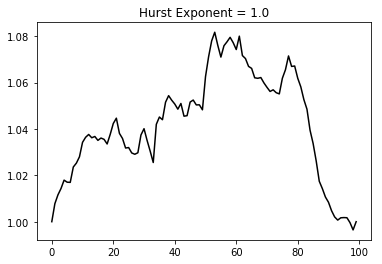

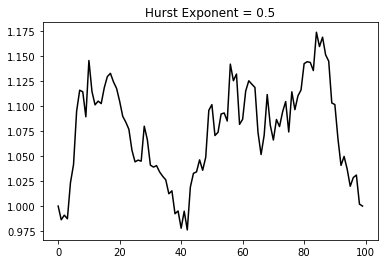

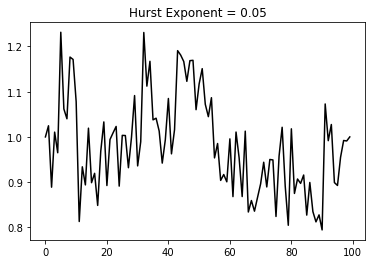

In [2]:
# Array based implementation; what I figured out; this was tough
from pylab import randn, ones, figure, plot, show, sqrt, title, zeros

def curve2(z,i_start,i_end,var,s):
    # Find di, the change in indices:
    di=i_end-i_start #subtract start from end
    
    #find the height of teh unperturbed midpoint
    h_in=z[i_start]+(z[i_end]-z[i_start])/2 #add difference between start and end positions to the start pos height

    if di > 1: # Base case, keep bisecting until the indices are 1 apart
        # Find the index of the midpoint in bisection (// is integer division)
        i_n=i_start+di//2
        # Set the value of z at the index where bisection occurs to
        # dz + perturbation:
        ds=h_in
        delta = sqrt(var) * randn()
        z[i_n]=ds+delta
        
        # Make recursive calls to the two segments on either side of the perturbed
        # point:
        curve2(z,i_start,i_n,var/s,s)
        curve2(z,i_n,i_end,var/s,s)
        #I didn't know a function did nto have to have a return statement
        
# Define the size of the array
N = 100

z = zeros(N)
z[0],z[-1]=1,1  # This is so results look like list results:
H = 1. # Hurst's exponent
curve2(z,0,N-1,0.01,2**(2*H))
figure(1)
plot(z,'k')
title("Hurst Exponent = 1.0")
show()

z = zeros(N)
z[0],z[-1]=1,1
H = 0.5 # Hurst's exponent
curve2(z,0,N-1,0.01,2**(2*H))
figure(1)
plot(z,'k')
title("Hurst Exponent = 0.5")
show()

z = zeros(N)
z[0],z[-1]=1,1
H = 0.05 # Hurst's exponent
curve2(z,0,N-1,0.01,2**(2*H))
figure(1)
plot(z,'k')
title("Hurst Exponent = 0.05")
show()

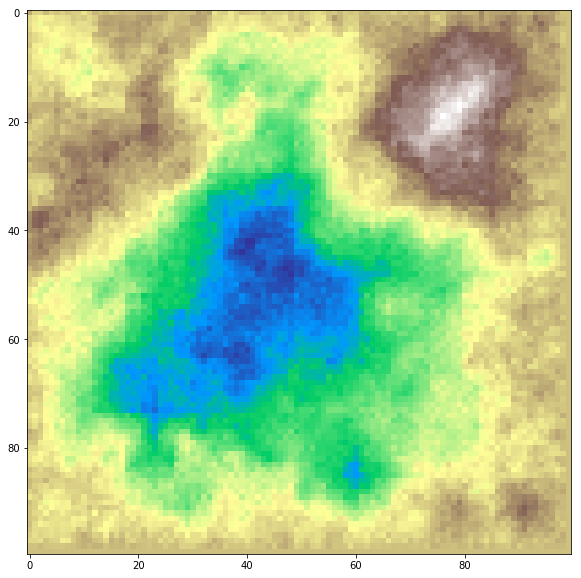

In [3]:
# 3D version! #this is the base code I was given that I will be rejiggering
from pylab import *
%matplotlib inline
def surface(z,i_s,i_e,j_s,j_e,var,s):
    """
    INPUTS:
    z - an NxN numpy array that will contain the finished landscape
    i_s - the index where the row of the region being perturbed at the center
           begins
    i_e - the index of the row where the region being perturbed at the center ends
    j_s - as with i_s, but now the begining column
    j_e - as with i_e, but now the ending column
    var - the variance
    s   - the range of perturbations, related to the Hurst exponent
    
    OUTPUT:
     because arrays are passed by reference, z will contain the landscape.
    """
    # Differences in indices in both directions
    di = i_e - i_s
    dj = j_e - j_s
    
    # The base from which to perturb, 1/4 the corners:
    z_b = .25*(z[i_s,j_s] + z[i_s,j_e] +\
                  z[i_e,  j_s] + z[i_e  ,j_e])    
    # Indices of the mid-point of the square being peturbed:
    i_n = i_s + di//2
    j_n = j_s + dj//2
    # Apply the perturbation to the center:
    z[i_n,j_n] = z_b + sqrt(var) * randn()
    
    if di > 1 or dj>1:  # Base case - continue until indices adjacent
        # Provide averages on edges for coming recursive calls
        z[i_s,j_n] = (z[i_s,j_s] + z[i_s,j_e]) / 2
        z[i_n,j_e] = (z[i_s,j_e] + z[i_e,j_e]) / 2
        z[i_e,j_n] = (z[i_e,j_s] + z[i_e,j_e]) / 2
        z[i_n,j_s] = (z[i_s,j_s] + z[i_e,j_s]) / 2

        surface(z ,i_s, i_n ,j_s ,j_n , var/s, s)
        surface(z ,i_n, i_e ,j_s ,j_n , var/s, s)
        surface(z ,i_s, i_n ,j_n ,j_e , var/s, s)
        surface(z ,i_n, i_e ,j_n ,j_e , var/s, s)
    

N = 100
z = zeros((N,N))
H = .75  # Hurst's exponent
surface(z,0,N-1,0,N-1,.1,2**(2*H))

figure(figsize=(10,10)) # Demand a large figure
imshow(z,cmap='terrain'); # Display the figure as an image with the terrain colormap
show() # Force display

### imshow assignment

Do the following to get familiar with imshow:

* try again with at least 3 different colormaps (https://matplotlib.org/examples/color/colormaps_reference.html)
* flip the image so that it is upside down (Hint: numpy trick)
* use a different interpolation scheme and make N=10 (https://matplotlib.org/examples/images_contours_and_fields/interpolation_methods.html)

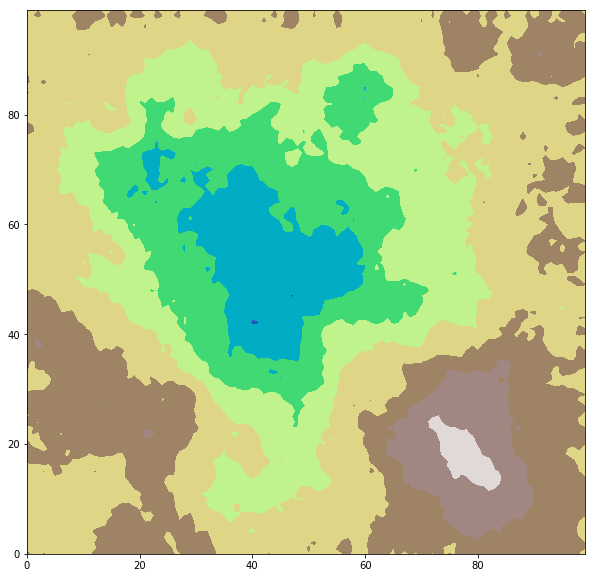

In [4]:
figure(figsize=(10,10)) 
x,y = meshgrid(range(0,N),range(0,N)) # Required for 3D calls
contourf(x,y,z,cmap='terrain'); #terrain is the original color map

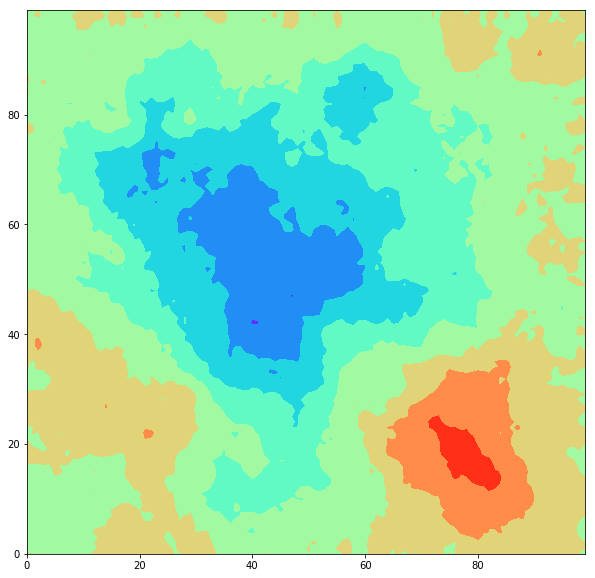

In [5]:
#Colro Map Variant 1
figure(figsize=(10,10)) 
x,y = meshgrid(range(0,N),range(0,N)) # Required for 3D calls
contourf(x,y,z,cmap='rainbow'); #make it colorful! rainbow!

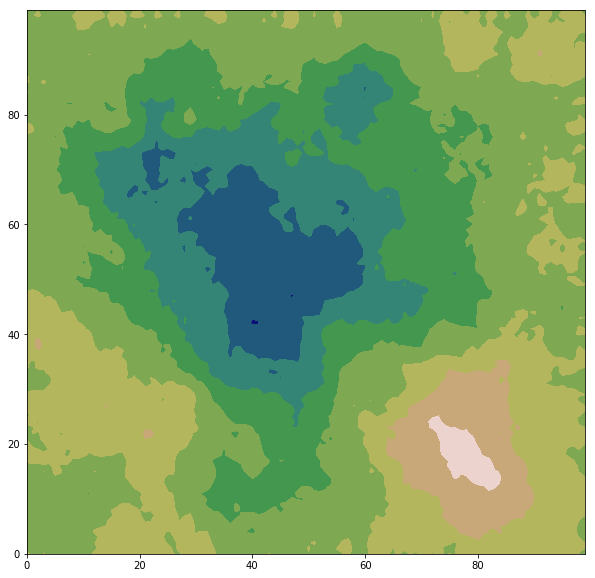

In [6]:
#Color Map Variant 2
figure(figsize=(10,10)) 
x,y = meshgrid(range(0,N),range(0,N)) # Required for 3D calls
contourf(x,y,z,cmap='gist_earth'); #gist earth version, kinda different from terrain

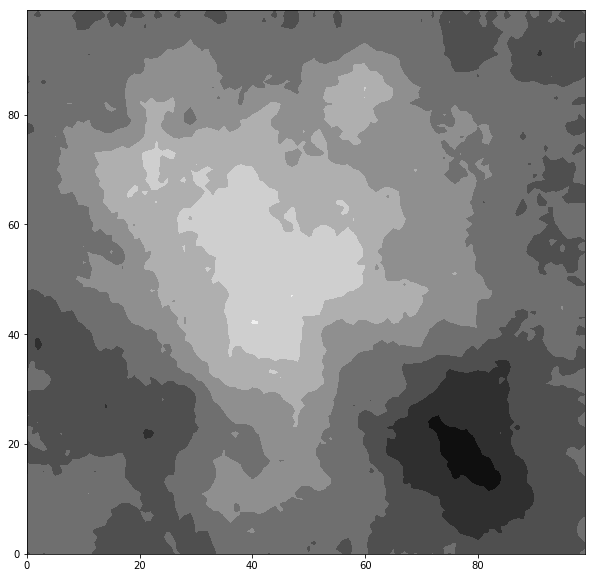

In [7]:
#Color Map Variant 3
figure(figsize=(10,10)) 
x,y = meshgrid(range(0,N),range(0,N)) # Required for 3D calls
contourf(x,y,z,cmap='binary'); #make it black and white!

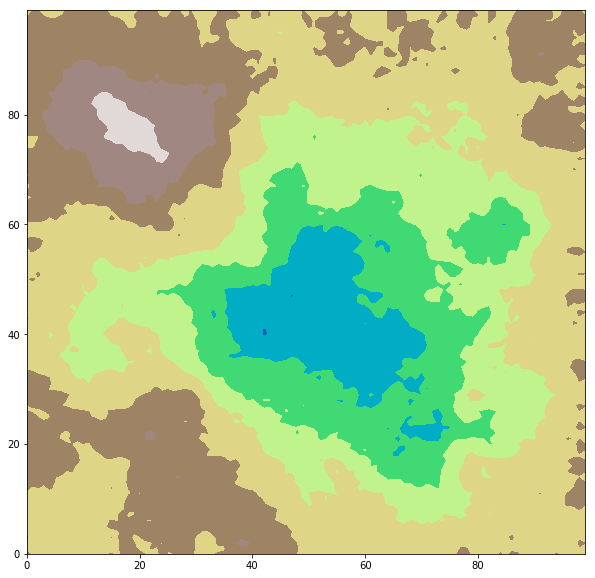

In [8]:
#now, I need to flip this image
figure(figsize=(10,10)) 
y,x = meshgrid(range(0,N),range(0,N)) # Required for 3D calls\
#if you switch x and y, the image gets flipped and on both the x and y axis
#z is teh array, so, why not try messing around with z and numpy functions
contourf(x,y,z,cmap='terrain'); 

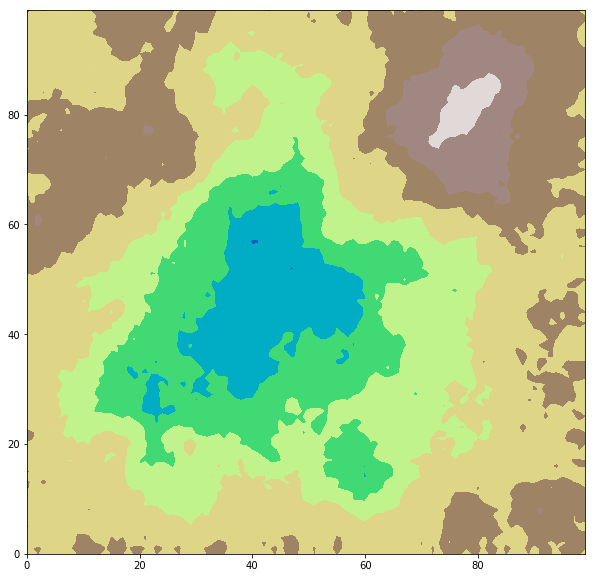

In [9]:
#now, I need to flip this image, huzzah!!!
from pylab import flipud
figure(figsize=(10,10)) 
x,y = meshgrid(range(0,N),range(0,N)) # Required for 3D calls
z1=flipud(z) #flipud flips the image along the x-axis
contourf(x,y,z1,cmap='terrain'); 

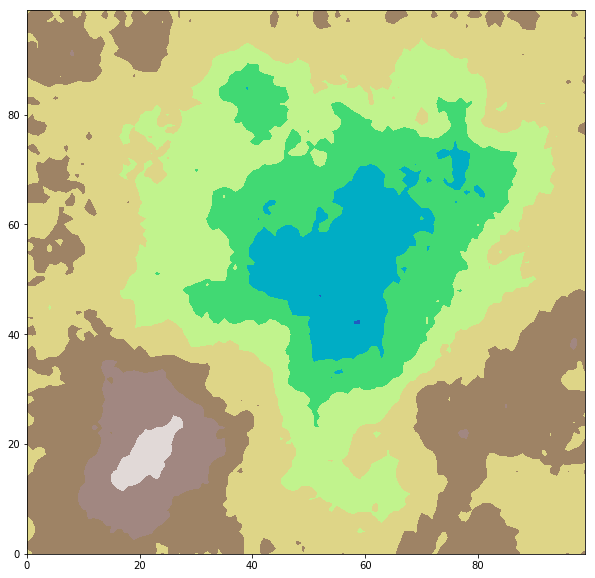

In [10]:
#now, I need to flip this image, huzzah!!!
from pylab import fliplr
figure(figsize=(10,10)) 
x,y = meshgrid(range(0,N),range(0,N)) # Required for 3D calls
z2=fliplr(z) #flipud flips the image along the y-axis
contourf(x,y,z2,cmap='terrain'); 

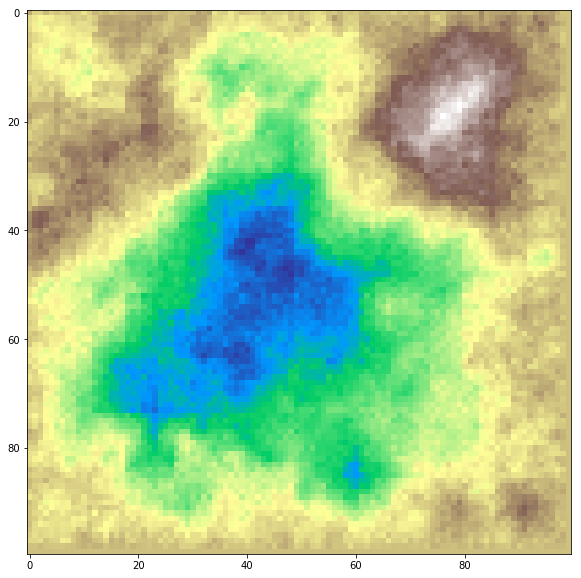

In [11]:
#Original- No Interpolation Scheme
figure(figsize=(10,10)) # Demand a large figure
imshow(z,cmap='terrain'); # Display the figure as an image with the terrain colormap
show() 

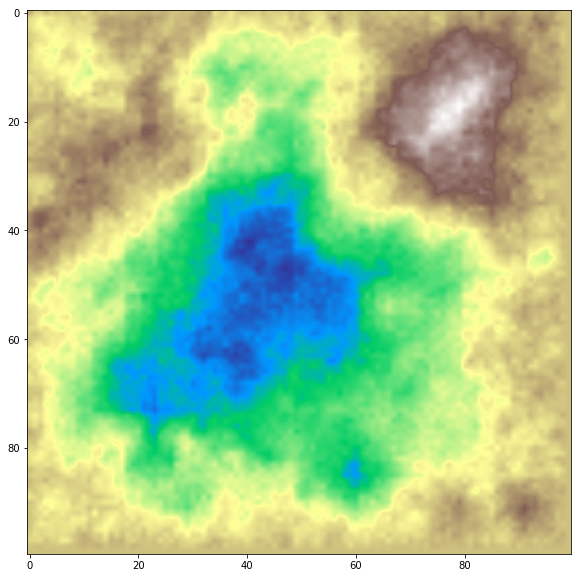

In [12]:
#Bilinear interpolation scheme
figure(figsize=(10,10)) 
imshow(z,interpolation='bilinear',cmap='terrain'); #the interpolation scheme shoudl eb specified in here
show() 

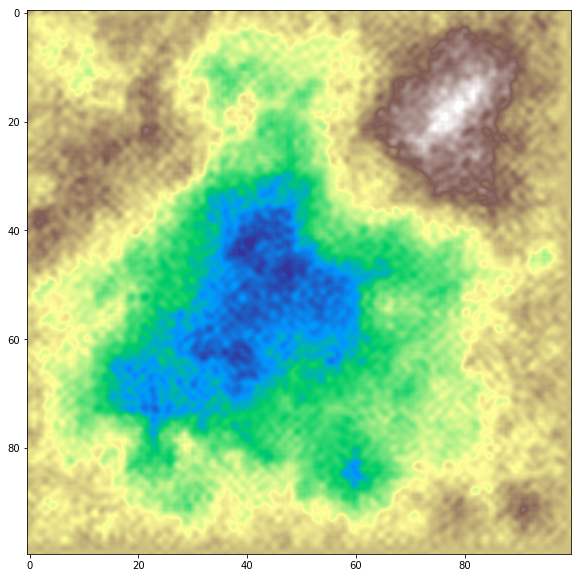

In [13]:
#sinc interpolation scheme
figure(figsize=(10,10)) 
imshow(z,interpolation='sinc',cmap='terrain'); #the interpolation scheme shoudl eb specified in here
show() 

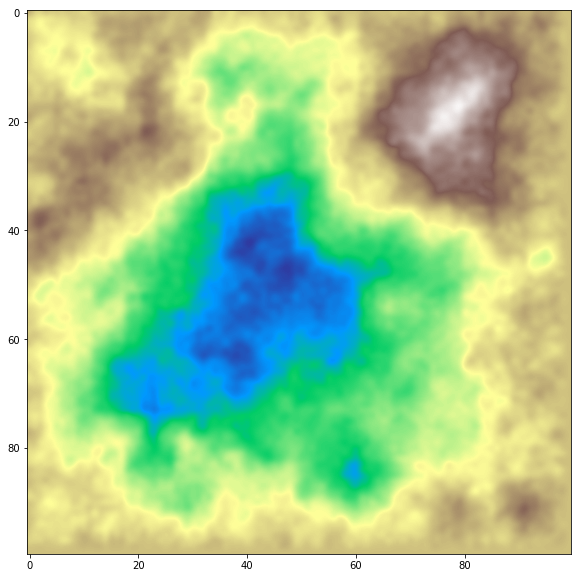

In [14]:
#bicubic interpolation scheme
figure(figsize=(10,10)) 
imshow(z,interpolation='bicubic',cmap='terrain'); #the interpolation scheme shoudl eb specified in here
show() 

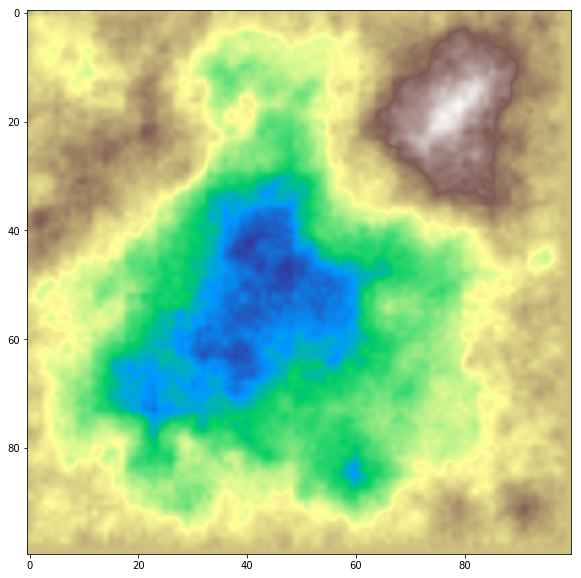

In [15]:
#gaussian interpolation scheme
figure(figsize=(10,10)) 
imshow(z,interpolation='gaussian',cmap='terrain'); #the interpolation scheme shoudl eb specified in here
show() 

### contour/contourf assignment

Do the following:
* Make 16 contour levels, evenly spaced (https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.contour.html)
* Use contour and label the contour lines (https://matplotlib.org/examples/pylab_examples/contour_demo.html)

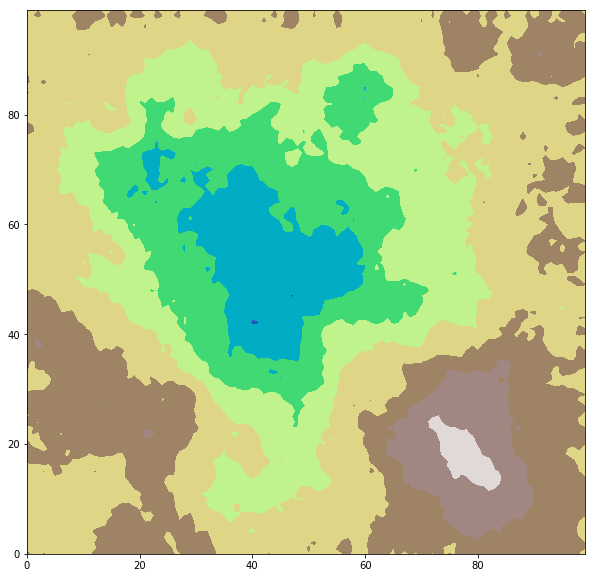

In [16]:
#doing the contour assignment
from pylab import contour
#original no changes
figure(figsize=(10,10)) 
x,y = meshgrid(range(0,N),range(0,N)) # Required for 3D calls
contourf(x,y,z,cmap='terrain'); #terrain is the original color map

<a list of 29 text.Text objects>

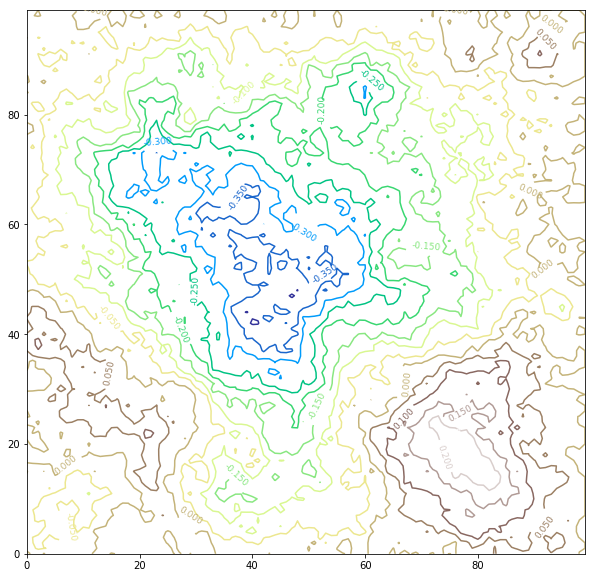

In [17]:
%%capture --no-display 
#captures output and makes it so we don't catch the display; this is to hide error messages

#made a default contour map with labels
from pylab import contour, clabel #changing to usign contour instead of contourf
#makign changes
figure(figsize=(10,10)) 
x,y = meshgrid(range(0,N),range(0,N)) # Required for 3D calls
CS=contour(x,y,z,16,linestyles='solid',cmap='terrain'); #terrain is the original color map
#we made the contour a variable so taht it can be passed onto the labelling function
clabel(CS,fontsize=9,inline=1)

<a list of 29 text.Text objects>

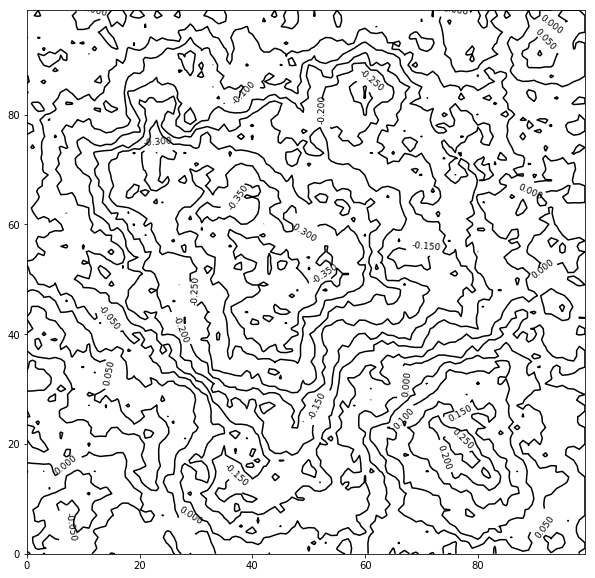

In [18]:
%%capture --no-display 

#made a contour map that is all black; there's some stuff that could be improved
from pylab import contour, clabel #changing to usign contour instead of contourf
#makign changes
figure(figsize=(10,10)) 
x,y = meshgrid(range(0,N),range(0,N)) # Required for 3D calls
CS=contour(x,y,z,16,linestyles='solid',colors='k'); #colors ='k' forces all the lines ot be black
#we made the contour a variable so taht it can be passed onto the labelling function
clabel(CS,fontsize=9,inline=1)

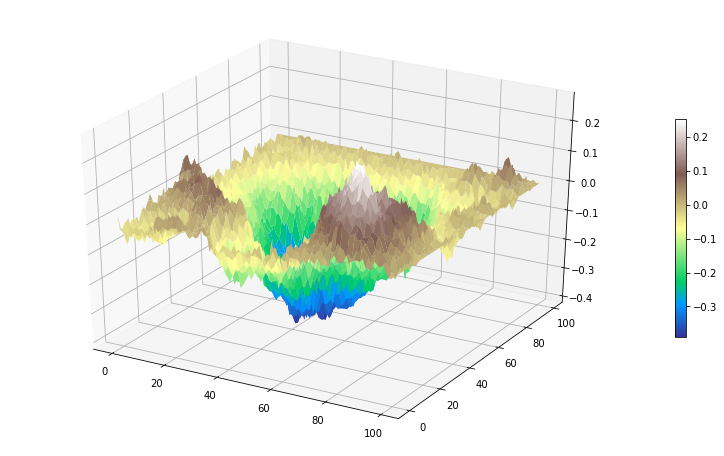

In [21]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = figure(figsize=(14,8))

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 1, 1, projection='3d')
p = ax.plot_surface(x,y,z, rstride=2, cstride=2, \
                    cmap=matplotlib.cm.terrain, linewidth=0, \
                    antialiased=True)

cb = fig.colorbar(p, shrink=0.5)

### plot_surface assignment

* Create a python program in Spyder and produce a 3D plot like the one above
* Modify the view with the mouse